# Partner Business Modeling



## Assignment

Scenario 1: It is going to be a huge Saturday and there will need to be many more cars on the road than last week. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

Option 1: USD 50 for each driver that is online at least 8 hours, accepts 90% of requests, completes 10 trips, and has a rating of 4.7 or better during the time frame;

Option 2: USD 4/trip for all drivers who complete 12 trips, and have a 4.7 or better rating.
Using the dataset provided and given Scenario 1, provide answers to the questions below:

How much would the total bonus payout be with Option 1?
How much would the total bonus payout be with Option 2?
How many drivers would qualify for a bonus under Option 1 but not under Option 2?
What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?

Scenario 2: A taxi driver currently generates $200 per day in fares (before expenses), works six days a week, takes three weeks off, and has the following expenses:

Gas - 200 dollors per week
Insurance - 400 dollors per month
Vehicle rent (by the week) - 500 dollors
The driver doesn't pay gas and rent expenses on off weeks.

Now, let's assume that the same driver would buy a Town Car and partner with Uber. If he does, his gas expenses would go up by 5%, his insurance expense would decrease by 20%, and he would no longer be renting a vehicle. However, he would need to buy a car. The driver would still take three weeks off per year.

Given Scenario 2, provide answers to the questions below:

How much money (after expenses) does the taxi driver make per year without partnering with Uber?
You are convincing the same driver above to buy a Town Car and partner with Uber. Assuming the new car is 40,000 USD, how much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?

## Data Description
The dataset is given in the file dataset_2.csv. The data come from rides on a busy Saturday and are aggregated on a driver level. The dataset provides information on the total number of completed trips, the driver's acceptance rate, the total number of hours on duty, and the average rating.

Only use this dataset to answer questions 1-4. There is no dataset provided for questions 5 and 6 as these are solely based on a given scenario.

## Practicalities
Please work on the questions in the displayed order. Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final answers. You are expected to spend no more than 2 hours solving this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/162XYA2iR8cLru4eNS8ZCjkt_LqOVUYjG?usp=sharing"> Click here </a>

In [4]:
import pandas as pd

# columns
pd.set_option('display.max_columns', None)


file_path = 'dataset_2.csv'  
data = pd.read_csv(file_path)


data.head()
 

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0


In [5]:
# Clean and transform data
data['Accept Rate'] = data['Accept Rate'].str.rstrip('%').astype(float)


data.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100.0,3,4.8
1,Abraham,12,83.0,5,4.7
2,Adelina,1,100.0,2,4.7
3,Akilah,1,100.0,2,4.9
4,Alec,21,76.0,11,5.0


In [6]:
# qualifying drivers for Option 1
option_1_criteria = (
    (data['Supply Hours'] >= 8) &
    (data['Accept Rate'] >= 90) &
    (data['Trips Completed'] >= 10) &
    (data['Rating'] >= 4.7)
)

qualifying_drivers_option_1 = data[option_1_criteria]

# total bonus payout for Option 1
total_bonus_option_1 = len(qualifying_drivers_option_1) * 50

total_bonus_option_1

1050

In [7]:
# qualifying drivers for Option 2
option_2_criteria = (
    (data['Trips Completed'] >= 12) &
    (data['Rating'] >= 4.7)
)

qualifying_drivers_option_2 = data[option_2_criteria]

# total bonus payout for Option 2
total_bonus_option_2 = qualifying_drivers_option_2['Trips Completed'].sum() * 4

total_bonus_option_2


2976

In [8]:
# Drivers qualifying for Option 1 but not for Option 2
qualifying_drivers_option_1_but_not_2 = qualifying_drivers_option_1[
    ~qualifying_drivers_option_1['Name'].isin(qualifying_drivers_option_2['Name'])
]

# Number of such drivers
num_drivers_option_1_but_not_2 = len(qualifying_drivers_option_1_but_not_2)

num_drivers_option_1_but_not_2


2

In [9]:
# the percentages of drivers online with specific criteria

total_drivers = len(data)

# Drivers who completed less than 10 trips
less_than_10_trips = len(data[data['Trips Completed'] < 10]) / total_drivers * 100

# Drivers who had an acceptance rate of less than 90%
less_than_90_acceptance = len(data[data['Accept Rate'] < 90]) / total_drivers * 100

# Drivers who had a rating of 4.7 or higher
rating_4_7_or_higher = len(data[data['Rating'] >= 4.7]) / total_drivers * 100

less_than_10_trips, less_than_90_acceptance, rating_4_7_or_higher


(33.61344537815126, 46.21848739495798, 68.90756302521008)

In [10]:
# Current yearly earnings and expenses without partnering with Uber

# Constants
fares_per_day = 200
days_per_week = 6
weeks_per_year = 52
weeks_off_per_year = 3
working_weeks_per_year = weeks_per_year - weeks_off_per_year

# Expenses
gas_expenses_per_week = 200
insurance_expenses_per_month = 400
vehicle_rent_per_week = 500

# Yearly income
yearly_income = fares_per_day * days_per_week * working_weeks_per_year

# Yearly expenses
yearly_gas_expenses = gas_expenses_per_week * working_weeks_per_year
yearly_insurance_expenses = insurance_expenses_per_month * 12
yearly_rent_expenses = vehicle_rent_per_week * working_weeks_per_year

# Total yearly expenses
total_yearly_expenses = yearly_gas_expenses + yearly_insurance_expenses + yearly_rent_expenses

# Yearly profit
yearly_profit = yearly_income - total_yearly_expenses

yearly_profit


19700

In [11]:
# New yearly expenses with Uber

# Constants for the new scenario
car_cost = 40000
gas_expense_increase = 1.05
insurance_expense_decrease = 0.80

# New expenses
new_gas_expenses_per_week = gas_expenses_per_week * gas_expense_increase
new_insurance_expenses_per_month = insurance_expenses_per_month * insurance_expense_decrease

# Yearly expenses
new_yearly_gas_expenses = new_gas_expenses_per_week * working_weeks_per_year
new_yearly_insurance_expenses = new_insurance_expenses_per_month * 12

# Total new yearly expenses
new_total_yearly_expenses = new_yearly_gas_expenses + new_yearly_insurance_expenses

# Including the car cost for the first year
total_expenses_with_car_cost = new_total_yearly_expenses + car_cost

# Required yearly income to maintain the same profit margin
required_yearly_income = yearly_profit + total_expenses_with_car_cost

# Required increase in weekly fares
required_increase_per_week = (required_yearly_income - yearly_income) / working_weeks_per_year

required_increase_per_week


306.734693877551

In [12]:
import matplotlib.pyplot as plt

# Number of Drivers meeting each criteria

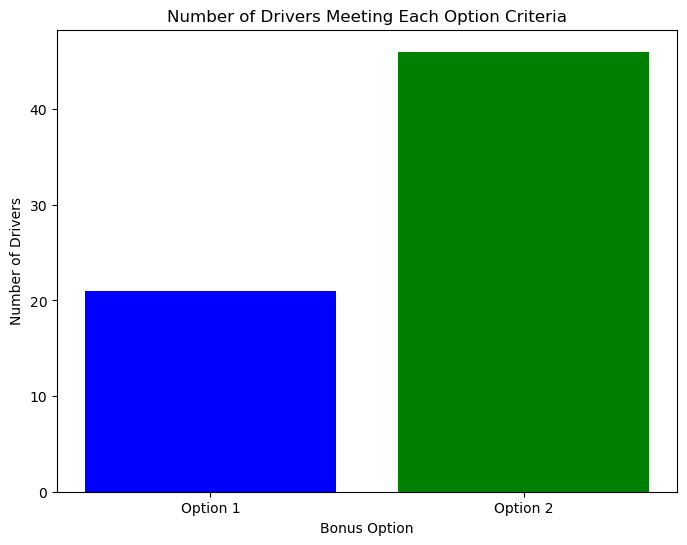

In [13]:
num_drivers_option_1 = len(qualifying_drivers_option_1)
num_drivers_option_2 = len(qualifying_drivers_option_2)

plt.figure(figsize=(8, 6))
options = ['Option 1', 'Option 2']
num_drivers = [num_drivers_option_1, num_drivers_option_2]
plt.bar(options, num_drivers, color=['blue', 'green'])
plt.xlabel('Bonus Option')
plt.ylabel('Number of Drivers')
plt.title('Number of Drivers Meeting Each Option Criteria')
plt.show()


# Acceptence rate

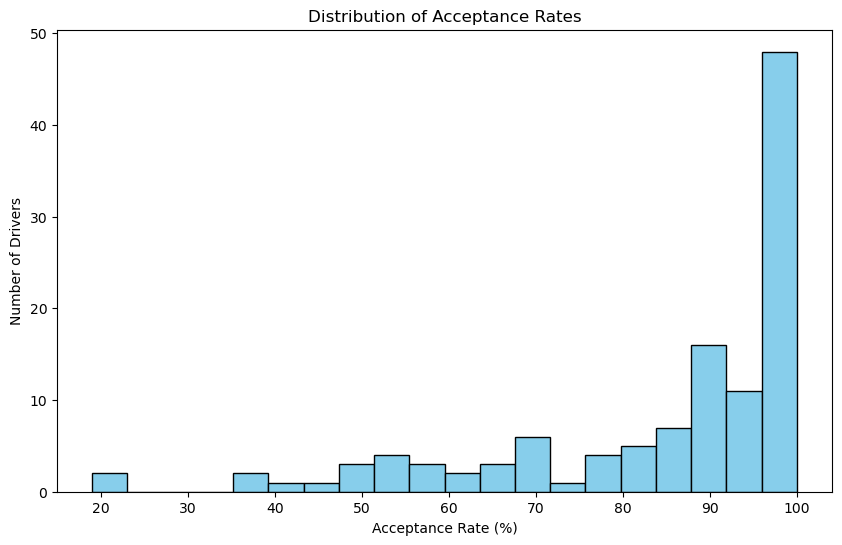

In [14]:

plt.figure(figsize=(10, 6))
plt.hist(data['Accept Rate'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Number of Drivers')
plt.title('Distribution of Acceptance Rates')
plt.show()


# Trips completed vs rating

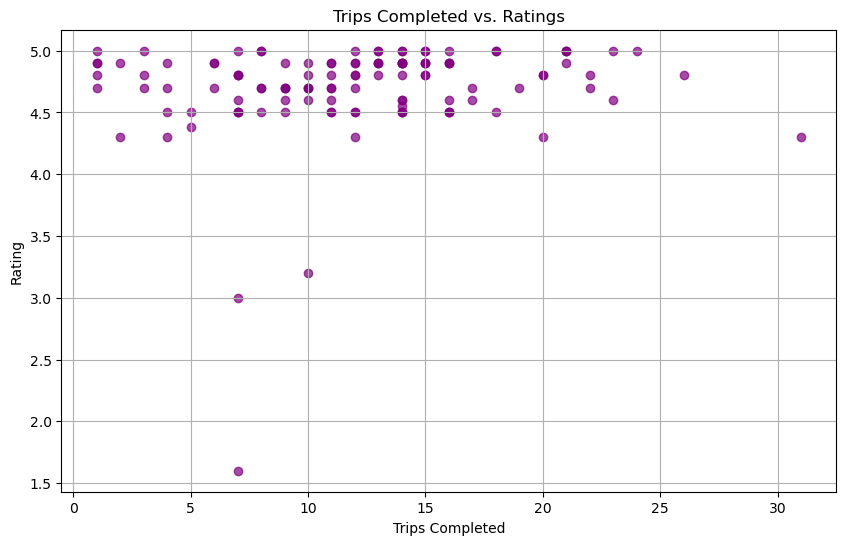

In [15]:

plt.figure(figsize=(10, 6))
plt.scatter(data['Trips Completed'], data['Rating'], alpha=0.7, color='purple')
plt.xlabel('Trips Completed')
plt.ylabel('Rating')
plt.title('Trips Completed vs. Ratings')
plt.grid(True)
plt.show()


# Percentage of drivers with specific criteria

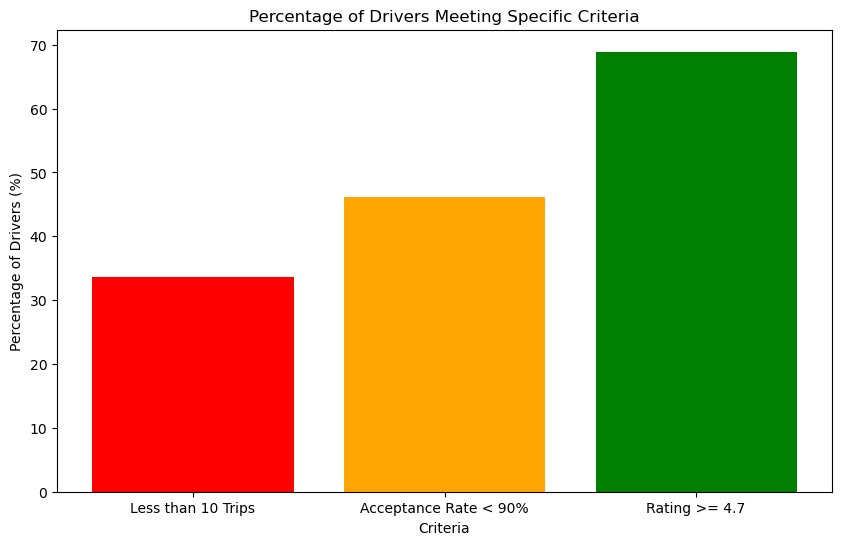

In [18]:
criteria = ['Less than 10 Trips', 'Acceptance Rate < 90%', 'Rating >= 4.7']
percentages = [less_than_10_trips, less_than_90_acceptance, rating_4_7_or_higher]

plt.figure(figsize=(10, 6))
plt.bar(criteria, percentages, color=['red', 'orange', 'green'])
plt.xlabel('Criteria')
plt.ylabel('Percentage of Drivers (%)')
plt.title('Percentage of Drivers Meeting Specific Criteria')
plt.show()
